In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical

import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image
from rasterio.enums import Resampling

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [4]:
path = "osmar_final4.aab"

src = rasterio.open(path)

raster = src.read(1)


cols = raster.shape[1] # colunas da imagem de entrada
rows = raster.shape[0] # linhas da imagem de entrada


labels = []
amostras = []


# Generating sample vector
for i in range(0, rows):
    
    labels.append(int(raster[i, 0]))

    features = []
    # Starting in 7, the other features are useless here
    for j in range(7, cols):
        features.append(float(raster[i, j]))
        
    amostra = []
    amostra.append(features)
        
    amostras.append(amostra)
    
amostras = np.array(amostras)

    
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
nClasses = len(np.unique(labels))

# label = np.transpose(label)
labels = to_categorical(labels, num_classes=nClasses)

C:\Users\osmar\Anaconda3\envs\tf\lib\site-packages\rasterio\__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [5]:
from sklearn.model_selection import train_test_split

#funcao train_test_split seprara os dados
# test_size: numero entre 0 e 1 que determina a porcentagem de imagens de validacao
x_train, x_test, y_train, y_test = train_test_split(amostras, labels, test_size=0.2, random_state=42)

In [ ]:
model.load_weights("lstm_pesos.hdf5")

In [8]:
model = Sequential()
model.add(LSTM(100,input_shape=(amostras.shape[1], amostras.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

model.fit(x_train,
          y_train,
          validation_data=(x_test, y_test),
          epochs=200,
          batch_size=128,
          verbose=1)

Train on 12000 samples, validate on 3000 samples
Epoch 1/200
12000/12000 [==============================] - 8s 699us/sample - loss: 2.0799 - categorical_accuracy: 0.2808 - val_loss: 1.6637 - val_categorical_accuracy: 0.4303
Epoch 2/200
12000/12000 [==============================] - 1s 55us/sample - loss: 1.5541 - categorical_accuracy: 0.4500 - val_loss: 1.1675 - val_categorical_accuracy: 0.6127
Epoch 3/200
12000/12000 [==============================] - 1s 56us/sample - loss: 1.3000 - categorical_accuracy: 0.5258 - val_loss: 1.0142 - val_categorical_accuracy: 0.6727
Epoch 4/200
12000/12000 [==============================] - 1s 51us/sample - loss: 1.1676 - categorical_accuracy: 0.5756 - val_loss: 0.9098 - val_categorical_accuracy: 0.7240
Epoch 5/200
12000/12000 [==============================] - 1s 50us/sample - loss: 1.1140 - categorical_accuracy: 0.5912 - val_loss: 0.8088 - val_categorical_accuracy: 0.7613
Epoch 6/200
12000/12000 [==============================] - 1s 51us/sample - loss

12000/12000 [==============================] - 1s 56us/sample - loss: 0.7002 - categorical_accuracy: 0.7479 - val_loss: 0.4736 - val_categorical_accuracy: 0.8360
Epoch 48/200
12000/12000 [==============================] - 1s 55us/sample - loss: 0.7175 - categorical_accuracy: 0.7433 - val_loss: 0.4691 - val_categorical_accuracy: 0.8317
Epoch 49/200
12000/12000 [==============================] - 1s 54us/sample - loss: 0.6949 - categorical_accuracy: 0.7502 - val_loss: 0.4460 - val_categorical_accuracy: 0.8527
Epoch 50/200
12000/12000 [==============================] - 1s 55us/sample - loss: 0.6816 - categorical_accuracy: 0.7547 - val_loss: 0.4247 - val_categorical_accuracy: 0.8573
Epoch 51/200
12000/12000 [==============================] - 1s 56us/sample - loss: 0.6795 - categorical_accuracy: 0.7599 - val_loss: 0.4246 - val_categorical_accuracy: 0.8553
Epoch 52/200
12000/12000 [==============================] - 1s 55us/sample - loss: 0.6815 - categorical_accuracy: 0.7538 - val_loss: 0.453

12000/12000 [==============================] - 1s 64us/sample - loss: 0.6301 - categorical_accuracy: 0.7737 - val_loss: 0.3930 - val_categorical_accuracy: 0.8557
Epoch 94/200
12000/12000 [==============================] - 1s 60us/sample - loss: 0.6320 - categorical_accuracy: 0.7761 - val_loss: 0.3841 - val_categorical_accuracy: 0.8620
Epoch 95/200
12000/12000 [==============================] - 1s 60us/sample - loss: 0.6285 - categorical_accuracy: 0.7719 - val_loss: 0.3980 - val_categorical_accuracy: 0.8500
Epoch 96/200
12000/12000 [==============================] - 1s 60us/sample - loss: 0.6347 - categorical_accuracy: 0.7753 - val_loss: 0.3795 - val_categorical_accuracy: 0.8670
Epoch 97/200
12000/12000 [==============================] - 1s 59us/sample - loss: 0.6427 - categorical_accuracy: 0.7657 - val_loss: 0.3939 - val_categorical_accuracy: 0.8603
Epoch 98/200
12000/12000 [==============================] - 1s 61us/sample - loss: 0.6523 - categorical_accuracy: 0.7629 - val_loss: 0.383

Epoch 140/200
12000/12000 [==============================] - 1s 64us/sample - loss: 0.5944 - categorical_accuracy: 0.7828 - val_loss: 0.3391 - val_categorical_accuracy: 0.8700
Epoch 141/200
12000/12000 [==============================] - 1s 59us/sample - loss: 0.6047 - categorical_accuracy: 0.7784 - val_loss: 0.3418 - val_categorical_accuracy: 0.8723
Epoch 142/200
12000/12000 [==============================] - 1s 63us/sample - loss: 0.6081 - categorical_accuracy: 0.7755 - val_loss: 0.3546 - val_categorical_accuracy: 0.8727
Epoch 143/200
12000/12000 [==============================] - 1s 60us/sample - loss: 0.6018 - categorical_accuracy: 0.7822 - val_loss: 0.3370 - val_categorical_accuracy: 0.8777
Epoch 144/200
12000/12000 [==============================] - 1s 57us/sample - loss: 0.6018 - categorical_accuracy: 0.7811 - val_loss: 0.3355 - val_categorical_accuracy: 0.8743
Epoch 145/200
12000/12000 [==============================] - 1s 55us/sample - loss: 0.5923 - categorical_accuracy: 0.785

12000/12000 [==============================] - 1s 58us/sample - loss: 0.5971 - categorical_accuracy: 0.7875 - val_loss: 0.3431 - val_categorical_accuracy: 0.8720
Epoch 187/200
12000/12000 [==============================] - 1s 58us/sample - loss: 0.5841 - categorical_accuracy: 0.7896 - val_loss: 0.3218 - val_categorical_accuracy: 0.8783
Epoch 188/200
12000/12000 [==============================] - 1s 58us/sample - loss: 0.5560 - categorical_accuracy: 0.7970 - val_loss: 0.3094 - val_categorical_accuracy: 0.8900
Epoch 189/200
12000/12000 [==============================] - 1s 65us/sample - loss: 0.5597 - categorical_accuracy: 0.8021 - val_loss: 0.3068 - val_categorical_accuracy: 0.8813
Epoch 190/200
12000/12000 [==============================] - 1s 63us/sample - loss: 0.5628 - categorical_accuracy: 0.7955 - val_loss: 0.3198 - val_categorical_accuracy: 0.8800
Epoch 191/200
12000/12000 [==============================] - 1s 62us/sample - loss: 0.5793 - categorical_accuracy: 0.7960 - val_loss: 

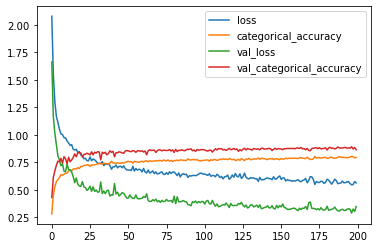

In [10]:
metrics = pd.DataFrame(model.history.history)
metrics.plot()

In [11]:
model.save_weights("lstm_pesos.hdf5")

In [12]:
model.save("lstm")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: lstm\assets


## Classificação

In [13]:
model = tf.saved_model.load("lstm")

infer = model.signatures["serving_default"]
print(infer.structured_outputs)

{'dense_1': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_1')}


In [14]:
path = "Hugo_corte3"
src = rasterio.open(path)
raster = src.read()

cols = raster.shape[1]
rows = raster.shape[2]

raster = raster.transpose(1,2,0).reshape(cols*rows,-1)
raster.shape = (raster.shape[0], 1, raster.shape[1])

classif = np.zeros((raster.shape[0], nClasses))

batch = 1500

for i in range(0, raster.shape[0], batch):
    classif[i:i+batch,:] = infer(tf.constant(raster[i:i+batch,:,:]))['dense_1']

pred = classif.argmax(axis=1)

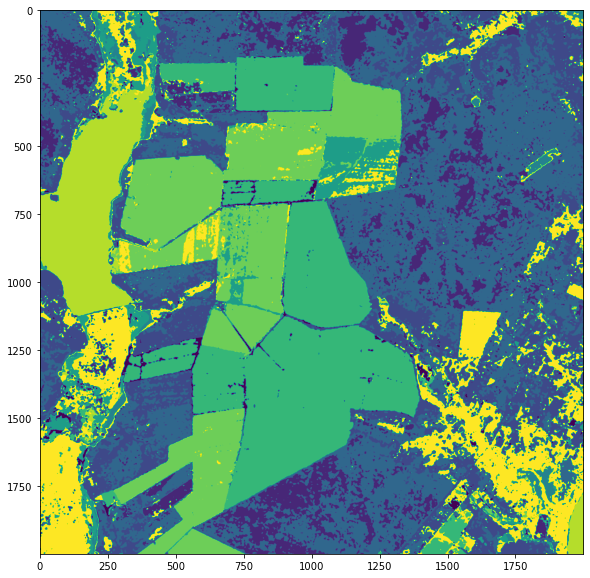

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(pred.reshape(2000,2000))